In [1]:
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [2]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [3]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
dependent=dataset[['charges']]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [55]:
from sklearn.tree import DecisionTreeRegressor
#regressor=DecisionTreeRegressor(criterion='poisson', splitter='random', max_depth=10, min_samples_split=15, min_samples_leaf=3, min_weight_fraction_leaf=0.4, max_features=2, random_state=1, max_leaf_nodes=5, min_impurity_decrease=2.3, ccp_alpha=1.2, monotonic_cst=[-1,-1, 0, 1,1])
regressor=DecisionTreeRegressor(criterion='poisson',splitter='best',max_depth=20,min_samples_split=20,min_samples_leaf=10,max_leaf_nodes=100,monotonic_cst=[1,1,1,1,1])
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=20, max_leaf_nodes=100,
                      min_samples_leaf=10, min_samples_split=20,
                      monotonic_cst=[1, 1, 1, 1, 1])

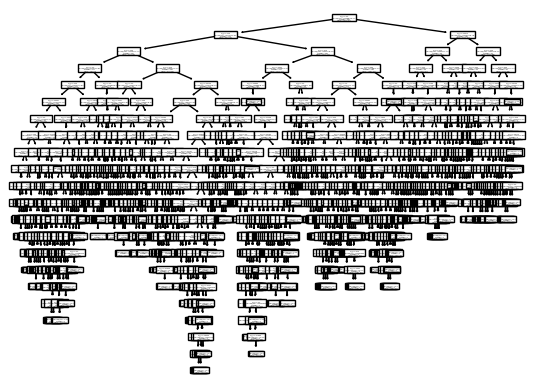

In [6]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [56]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
r_score=r2_score(y_pred,y_test)
r_score

0.8753532259180659